In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')

### Generate a “label” data set. We will use such data sets for classification and prediction. Take window=5 days and for each day compute rolling moving average (call this x) and rolling standard deviation (call this y). For each such day, we compute the vector (x, y, label) as follows:
##### a. this day is assigned (x, y, +) if next day return is positive (or zero)
#### b. this day is assigned (x, y, -) if next day return is negative

In [3]:
win=5

new_df = df.copy()
new_df.rename(columns={'Adj Close': 'Price'}, inplace = True) 
new_df = new_df[['Date', 'Price']]
new_df['pct_change'] = new_df['Price'].pct_change() 
new_df['pct_change_size'] = abs(new_df['pct_change'])
new_df['pct_change_win'] = new_df['Price'].pct_change(win) 
new_df['std'] = new_df['pct_change'].rolling(win).std() 
new_df['pct_tomorrow'] = new_df['pct_change'].shift(1) 
new_df['label'] = new_df['pct_tomorrow'] > 0

In [4]:
new_df


,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label
0,2013/9/16,34.026104,NaN,NaN,NaN,NaN,NaN,False
1,2013/9/17,33.885891,-0.004121,0.004121,NaN,NaN,NaN,False
2,2013/9/18,34.876091,0.029222,0.029222,NaN,NaN,-0.004121,False
3,2013/9/19,34.692081,-0.005276,0.005276,NaN,NaN,0.029222,True
4,2013/9/20,34.087433,-0.017429,0.017429,NaN,NaN,-0.005276,False
5,2013/9/23,34.104969,0.000514,0.000514,0.002318,0.017328,-0.017429,False
6,2013/9/24,34.140015,0.001028,0.001028,0.007499,0.017131,0.000514,True
7,2013/9/25,34.135738,-0.000125,0.000125,-0.021228,0.007783,0.001028,True
8,2013/9/26,34.514431,0.011094,0.011094,-0.005121,0.010288,-0.000125,False
9,2013/9/27,34.100506,-0.011993,0.011993,0.000384,0.008188,0.011094,True


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

colors = np.where(new_df['label'] == True , 'g', 'r')
# plotting
new_df.plot(kind='scatter', x='pct_change_win', y='std',c=colors, s=new_df['pct_change_size']*500 )
plt.show()

<Figure size 640x480 with 1 Axes>

### KNN: Predicted label by k nearest neighbor classification for 2017 data

In [6]:
#Pick one year: 2017 + the last 30 days of 2016
new_df['Date'] = pd.to_datetime(new_df['Date'])
start_date = '11-16-2016'
end_date = '12-31-2017'
mask = (new_df['Date'] > start_date) & (new_df['Date'] <= end_date)
new_df = new_df.loc[mask]

#### Assign “predicted” label to point at time N to be the label of the nearest neighbor
(Euclidean distance, from previous 30 points)

In [7]:
from scipy.spatial import distance

def getPredictedLabel(df,starting_row,k):
    distance_euclidean = {}
    a = (df.loc[starting_row]['pct_change_win'],df.loc[starting_row]['std'])
    
    for i in range(1,31):
        b = (df.loc[starting_row-i]['pct_change_win'],df.loc[starting_row-i]['std'])
        dst_euclidean = distance.euclidean(a,b)
        distance_euclidean[i]= dst_euclidean

    sorted_distance_euclidean = sorted(distance_euclidean, key=distance_euclidean.get)
    neareast_i = sorted_distance_euclidean[:k]
    neareast_rows = [starting_row - i for i in neareast_i]
    predicted_labels = [df.loc[row]['label'] for row in neareast_rows]
    predicted_label = True if np.bincount(predicted_labels).argmax()==1 else False
    return predicted_label
    

In [8]:
# 831 = first day in 2017
# 1082 = last day in 2017

ks = list(range(1,16,2)) 
predicted_labels = {}
for k in ks:
    predicted_labels_per_k = []
    for row in range(831, 1082):
        predicted_labels_per_k.append(getPredictedLabel(new_df,row,k))
    predicted_labels[k]=predicted_labels_per_k
    
predicted_labels   

{1: [True,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  Fals

### compute misclassification statistics for different ks

In [9]:
#Pick only 2017 data 
df_2017 = new_df.copy()
df_2017['Date'] = pd.to_datetime(df_2017['Date'])
start_date = '01-01-2017'
end_date = '12-31-2017'
mask = (df_2017['Date'] > start_date) & (df_2017['Date'] <= end_date)
df_2017 = df_2017.loc[mask]
df_2017


,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label
831,2017-01-03,28.554270,0.014388,0.014388,-0.012893,0.010036,-0.003074,False
832,2017-01-04,29.566833,0.035461,0.035461,0.026104,0.019598,0.014388,True
833,2017-01-05,29.566833,0.000000,0.000000,0.036862,0.018006,0.035461,True
834,2017-01-06,29.383608,-0.006197,0.006197,0.040642,0.017198,0.000000,False
835,2017-01-09,29.345034,-0.001313,0.001313,0.042480,0.016927,-0.006197,False
836,2017-01-10,29.026800,-0.010845,0.010845,0.016548,0.018417,-0.001313,False
837,2017-01-11,29.103947,0.002658,0.002658,-0.015656,0.005374,-0.010845,False
838,2017-01-12,29.084658,-0.000663,0.000663,-0.016308,0.005285,0.002658,True
839,2017-01-13,29.007515,-0.002652,0.002652,-0.012799,0.005026,-0.000663,False
840,2017-01-17,28.602489,-0.013963,0.013963,-0.025304,0.007025,-0.002652,False


In [10]:
labels = list(df_2017.loc[: , "label"])
#labels

[False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 T

In [11]:
def getMisClassificationRatio(actual, predict):
    error_count = 0 
    for i in range(len(actual)):
        if actual[i]!=predict[i]:
            error_count+=1
    error_rate = error_count/len(actual)
    return error_rate

In [12]:
error_rates = []
for k, v in predicted_labels.items():
    error_rate = round(getMisClassificationRatio(labels,v),2)
    error_rates.append(error_rate)
    print("k=",k, " mis-classification ratio=",error_rate)


k= 1  mis-classification ratio= 0.4
k= 3  mis-classification ratio= 0.41
k= 5  mis-classification ratio= 0.4
k= 7  mis-classification ratio= 0.42
k= 9  mis-classification ratio= 0.43
k= 11  mis-classification ratio= 0.39
k= 13  mis-classification ratio= 0.38
k= 15  mis-classification ratio= 0.37


#### Plot the following graph:
- X is the number of neighbors that you used : X = 1, 3, 5, …., 15
- Y is mis-classification ratio

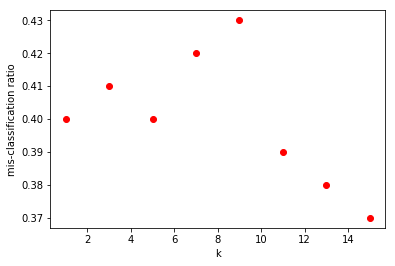

In [13]:
import matplotlib.pyplot as plt
# plotting
plt.xlabel('k')
plt.ylabel('mis-classification ratio')
plt.plot(ks,error_rates , 'ro')
plt.show()